## Praca domowa 6
### Paweł Fijałkowski
#### Grupa 2

In [8]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
faces, _ = fetch_olivetti_faces(return_X_y = True)

In [15]:
data = pd.DataFrame(faces)

In [18]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,0.309917,0.367769,0.417355,0.442149,0.528926,0.607438,0.657025,0.677686,0.690083,0.685950,...,0.665289,0.669421,0.652893,0.661157,0.475207,0.132231,0.148760,0.152893,0.161157,0.157025
1,0.454545,0.471074,0.512397,0.557851,0.595041,0.640496,0.681818,0.702479,0.710744,0.702479,...,0.136364,0.157025,0.136364,0.148760,0.152893,0.152893,0.152893,0.152893,0.152893,0.152893
2,0.318182,0.400826,0.491736,0.528926,0.586777,0.657025,0.681818,0.685950,0.702479,0.698347,...,0.074380,0.132231,0.181818,0.136364,0.128099,0.148760,0.144628,0.140496,0.148760,0.152893
3,0.198347,0.194215,0.194215,0.194215,0.190083,0.190083,0.243802,0.404959,0.483471,0.516529,...,0.652893,0.636364,0.657025,0.685950,0.727273,0.743802,0.764463,0.752066,0.752066,0.739669
4,0.500000,0.545455,0.582645,0.623967,0.648760,0.690083,0.694215,0.714876,0.723140,0.731405,...,0.190083,0.161157,0.177686,0.173554,0.177686,0.177686,0.177686,0.177686,0.173554,0.173554


Każda obserwacja, zdjęcie to ciąg 4096 pikseli (64x64) przechowywujących informacje o skali szarości (od 0 do 1).

In [67]:
def images(data, which):
    plt.figure(figsize=(20, 8))
    for index, row in data.loc[which].iterrows():
        plt.subplot(2,5, int(index/10) + 1)
        plt.imshow(row.values.reshape((64, 64)), cmap=plt.cm.gray)
        

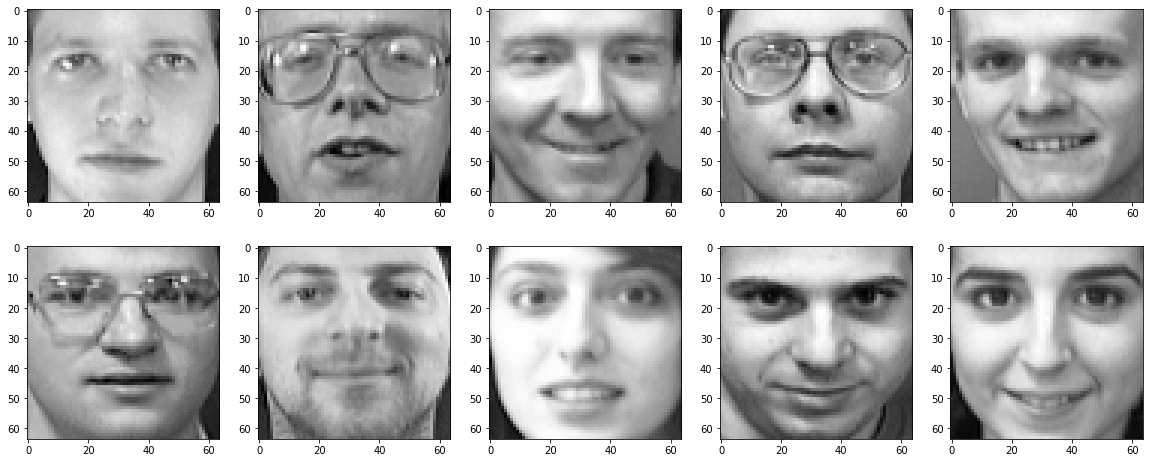

In [120]:
which = range(0,100,10)
images(data, which)

Wykorzystamy teraz metodę redukcji wymiarowości PCA do wykrycia tych zmiennych (czytaj pikseli), które wyjaśniają zadawalający nas procent wariancji.

In [102]:
THRESHOLD_VARIANCE_TOTAL = 0.9

In [72]:
pca_model = PCA().fit(data)

In [95]:
variances = pca_model.explained_variance_ratio_[pca_model.explained_variance_ratio_ > THRESHOLD_VARIANCE_SINGULAR]
np.cumsum(variances)

array([0.23812719, 0.378067  , 0.45775306, 0.5077363 , 0.54383487,
       0.57540417, 0.5996725 , 0.6200365 , 0.6396176 , 0.6563388 ,
       0.67229104, 0.6866608 , 0.69912827, 0.7105996 , 0.72122836,
       0.73100555, 0.74019617, 0.74835193, 0.75589067, 0.7633605 ,
       0.7703463 , 0.7764926 , 0.7823319 , 0.78802913, 0.79349107,
       0.79880965, 0.8039478 ], dtype=float32)

In [103]:
n_components = current_sum = 0
while current_sum < THRESHOLD_VARIANCE_TOTAL:
    current_sum += pca_model.explained_variance_ratio_[n_components]
    n_components += 1
print(f"Features needed for explaining {THRESHOLD_VARIANCE_TOTAL} total variance: {n_components}")

Features needed for explaining 0.9 total variance: 66


Wnioskujemy więc, że aby wyjaśnić przynajmniej 90% wariancji zbioru danych, należy wykorzystać przynajmniej 66 komponenty w PCA.

In [112]:
pca_object = PCA(n_components = n_components)
data_compressed = pca_object.fit_transform(data)
data_compressed = pd.DataFrame(data_compressed)

In [113]:
data_compressed.head()

,0,1,2,3,4,5,6,7,8,9,...,56,57,58,59,60,61,62,63,64,65
0,-6.432605,-0.703667,-1.430020,1.278538,2.564395,-0.950610,2.081759,-2.937944,-0.373884,0.243110,...,0.907474,0.134270,-0.144889,0.447007,0.216140,0.537148,-0.138681,-0.120079,-0.093984,-0.550206
1,-1.075895,-6.697339,1.842798,5.082052,0.730560,-1.755449,-1.575949,-2.100693,-1.072456,2.061432,...,0.013678,0.231437,0.384280,0.436308,1.039882,-0.142660,-0.047086,-0.545549,-0.005961,-0.387094
2,-5.292950,-1.542512,0.225952,1.111250,2.640081,-1.674565,2.232203,-3.189350,-1.565528,0.599970,...,0.412671,0.112089,-0.456838,0.211609,0.008317,0.757684,0.039508,-0.057193,0.283103,-0.025457
3,-4.253579,11.327743,0.091874,-0.220420,1.407451,-0.828457,-1.170799,-0.395943,-0.189311,0.112228,...,0.677775,-0.128304,-0.087111,-0.673232,0.193524,-0.144637,-0.420580,0.026659,-0.455119,-0.393624
4,-3.962007,-3.293877,3.652867,3.553490,2.785626,-1.815465,-1.152093,-1.140843,-1.095517,1.024138,...,-0.078590,0.404397,-0.309109,0.219734,0.795506,0.237940,-0.055772,-0.468740,0.570749,0.264094


In [114]:
print(f"Współczynnik kompresji: {data.shape[1]/data_compressed.shape[1]}")

Współczynnik kompresji: 62.06060606060606


Wykorzystując algorytm PCA, osiągneliśmy bardzo znaczącą (62 krotną, 1GB -> 16 MB) kompresję obrazu.
Sprawdzimy teraz, odtwarzając powyższe wyniki, w jaki sposób wpłynęło to na jakość obrazu.

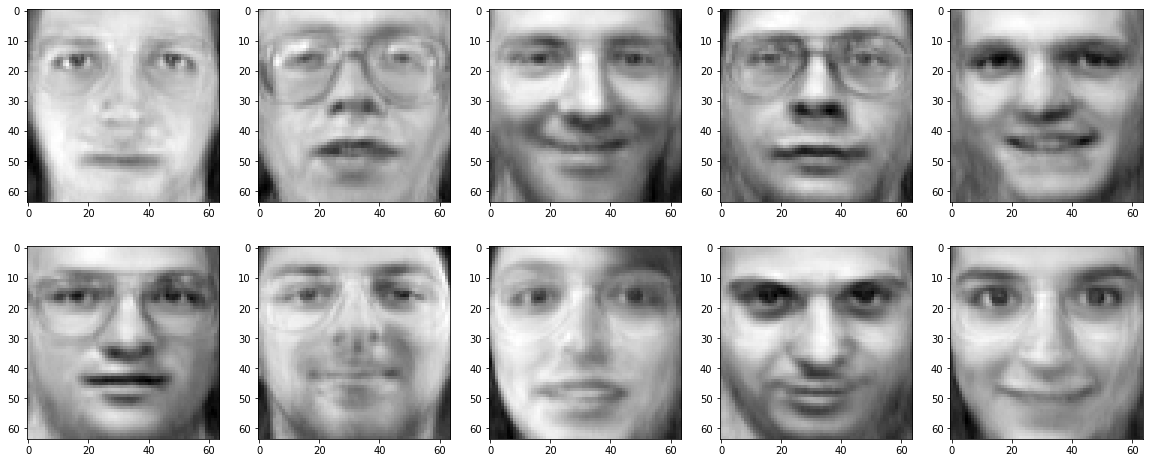

In [123]:
data_inversed = pd.DataFrame(pca_object.inverse_transform(data_compressed))
images(data_inversed,which)

Dość znacząca utrata jakości obrazu, ale twarze są dalej rozpoznawalne i relatywnie wyraźne. Trzeba pamiętać jak mocnej kompresji poddaliśmy te dane. Wyobraźmy sobie sytuację gdzie mamy słabe połączenie internetowe i relatywnie "proste" obrazy, takie jak wyraźne kształty geometryczne. W przypadku chęci przesłania dalej wielu gigabajtów tych danych, bez większej straty moglibyśmy, bardzo sprawnie przesłać skompresowane dane (wraz z narzutem związanym z "principal axes").

Poniżej wyliczamy metryki błędów (RMSE) dla każdej z obserwacji.

In [233]:
rmse = [0 for _ in range(len(data))]
for i in range(len(data)):
    rmse[i] = mean_squared_error(data.loc[i], data_inversed.loc[i], squared=False)
mean_no_transform = np.mean(rmse)

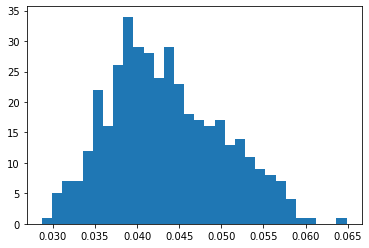

In [137]:
plt.hist(rmse,bins=30);

In [210]:
def rotate90(data):
    result = pd.DataFrame(columns=range(1,4097))
    for i in range(len(data)):
        tmp = np.transpose(data.loc[i].values.reshape((64, 64)))
        result.loc[i] = tmp.reshape((4096,) )
    return result

def lighten(data, value):
    return data.applymap(lambda x: min(max(x + value, 0), 1))

def darken(data, value):
    return data.applymap(lambda x: min(max(x - value, 0), 1))
    

In [183]:
rotated = rotate90(data)

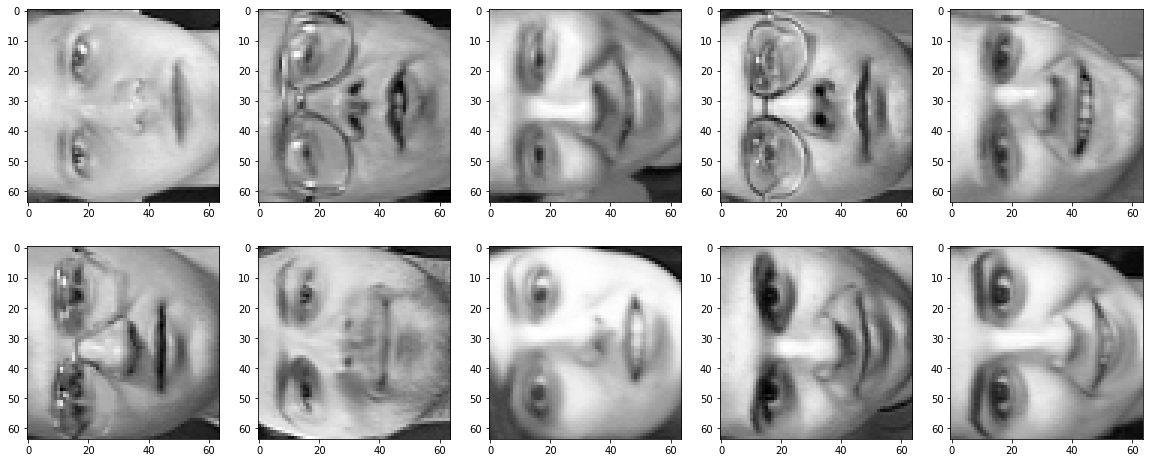

In [187]:
images(rotated,which)

In [216]:
darkened = darken(data,0.35)
lightened = lighten(data, 0.35)

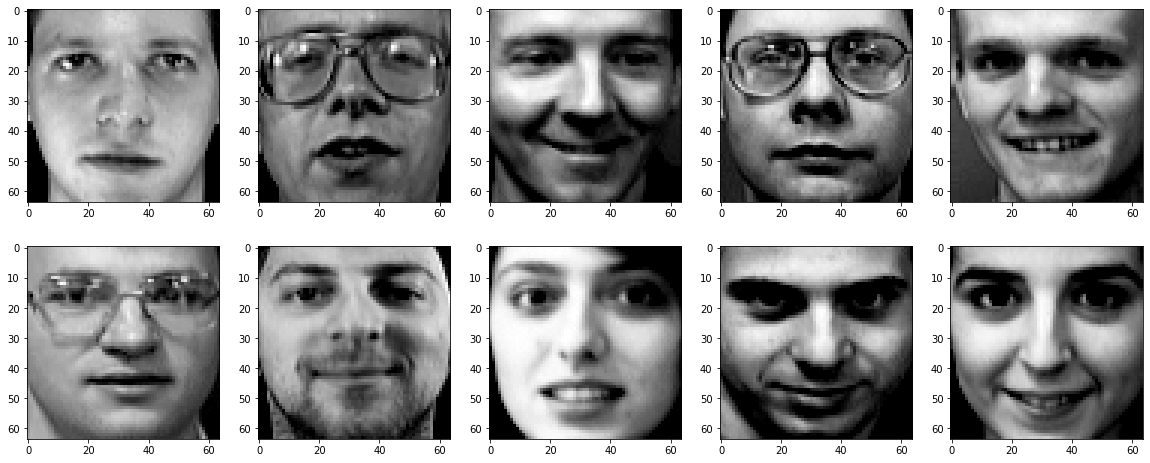

In [215]:
images(darkened,which)

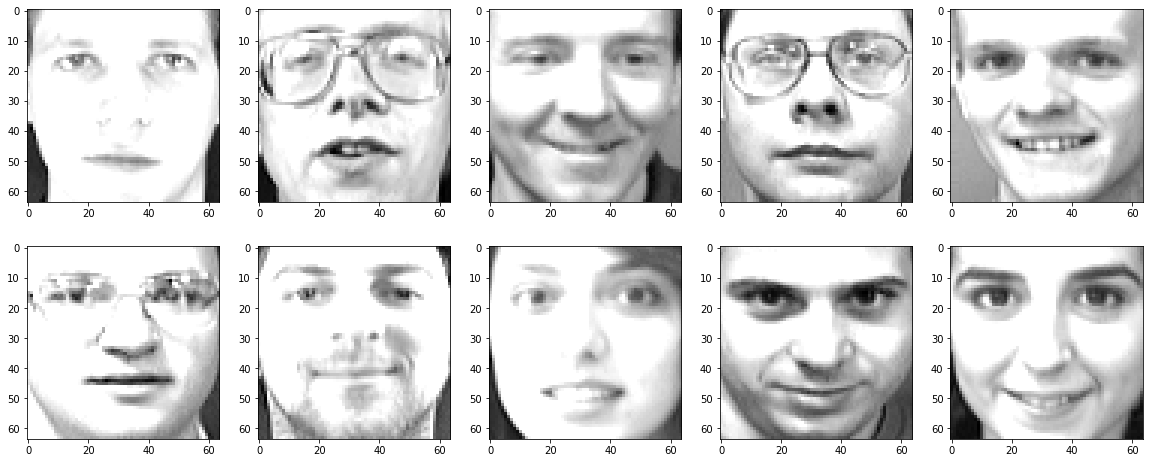

In [218]:
images(lightened,which)

In [228]:
def compress_inverse_show_me(modified):
    compressed = pca_used.transform(modified)
    inversed = pd.DataFrame(pca_object.inverse_transform(compressed))
    images(inversed,which)
    rmse = [0 for _ in range(len(data))]
    for i in range(len(data)):
        rmse[i] = mean_squared_error(data.loc[i], inversed.loc[i], squared=False)
    return np.mean(rmse)
    

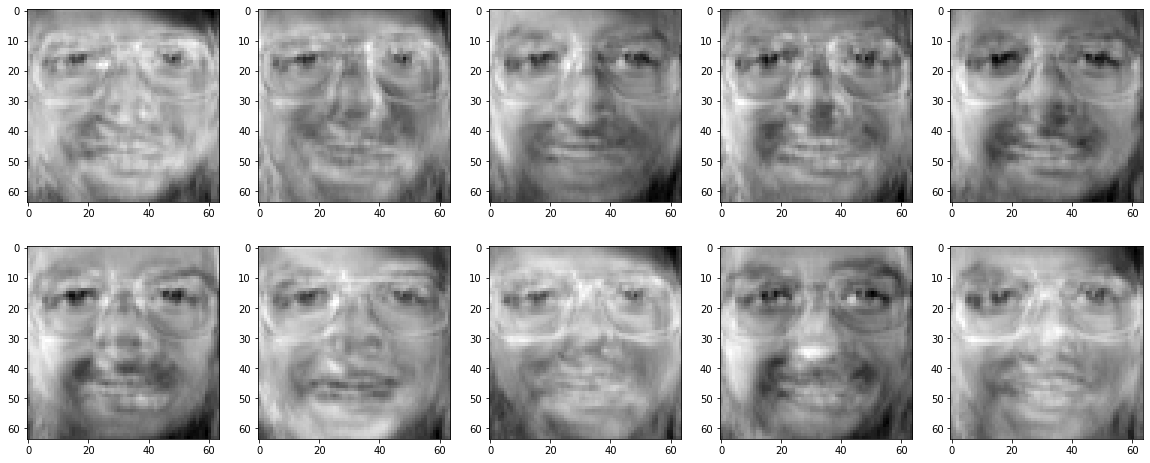

In [230]:
mean_rmse_rotated = compress_inverse_show_me(rotated)

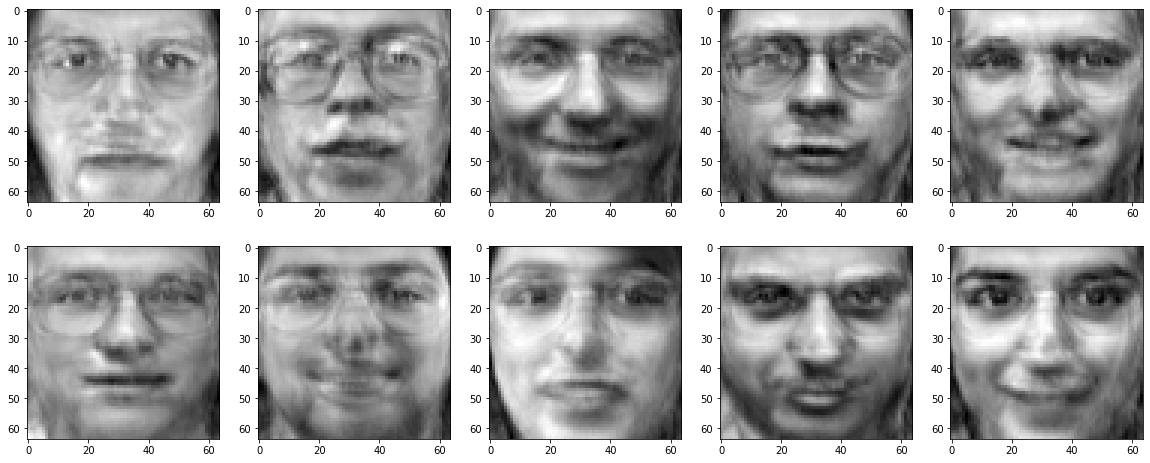

In [231]:
mean_rmse_darkened = compress_inverse_show_me(darkened)

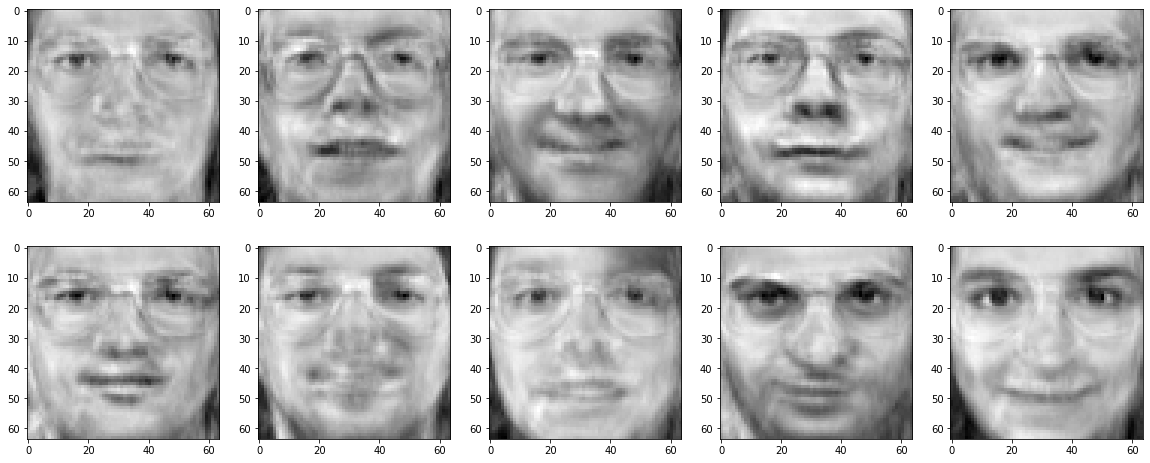

In [232]:
mean_rmse_lightened = compress_inverse_show_me(lightened)

In [235]:
print(f"""
RMSE no transform: {mean_no_transform}\n
RMSE rotated: {mean_rmse_rotated}\n
RMSE lightened: {mean_rmse_lightened}\n
RMSE darkened: {mean_rmse_darkened}\n
""")


RMSE no transform: 0.04342072829604149

RMSE rotated: 0.17178848385810852

RMSE lightened: 0.32692557153741747

RMSE darkened: 0.3405144709596915




## Wnioski


1. PCA może służyć wydajnej kompresji danych, w szczególności zdjęć tak jak przedstawionym powyżej przykładzie. Trzeba jednak liczyć się ze znaczną stratą na jakości w przypadku bardziej szczegółowych obiektów.


2. Mając do dyspozycji wzór zdjęcia (wyjściowe nie przekształcone) i wykonując na nim PCA, możemy określić średni błąd RMSE. Potem w przypadku zajścia jakieś transformacji (prześwietlenia, zaciemnienia, rotacji) możemy poprzez kompresję PCA (wykorzystując obiekt nauczony na "wzorcowych" danych), a potem odtworzenie pierwotnego rezultatu stwierdzać podobieństwo przekształconego obrazu względem wzorca (porównując RMSE tych przekształceń).
